# Replicate BBC COVID-19 cases across Scotland plots

My attempt to replicate BBC plot of covid cases across scotland from this article: https://www.bbc.co.uk/news/uk-scotland-54250312. 

There is a warning "The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters". Which I don't know how to resolve

In [7]:
# import packages

import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
# Import data daily cases from nhs scotlanld
url = "https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20201012.csv"
df = pd.read_csv(url)
df.head()

,Date,DailyCases,CumulativeCases,Deaths
0,20200228,1,1,0
1,20200229,0,1,0
2,20200301,2,3,0
3,20200302,1,4,0
4,20200303,3,7,0


In [3]:
# Transform column date into date data
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') 

In [4]:
# Calculate seven day mean 
df['Mean_7'] = df.iloc[:,1].rolling(window=7).mean()

In [5]:
df.tail()

,Date,DailyCases,CumulativeCases,Deaths,Mean_7
224,2020-10-09,1085,39465,2560,1033.285714
225,2020-10-10,921,40386,2566,1064.714286
226,2020-10-11,931,41317,2571,1091.428571
227,2020-10-12,1164,42481,2571,1100.857143
228,2020-10-13,204,42685,2572,960.142857


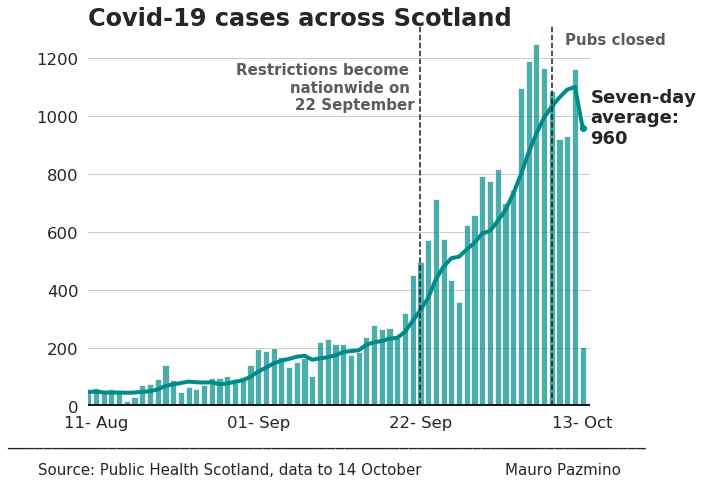

In [24]:
sns.set(font_scale=1.5) #set fontsize
sns.set_style("whitegrid") # set seaborn style

plt.rcParams['font.family'] = "DejaVu Sans" #BBC uses Helvetic font but matplotlib does not have it

# plot

fig, ax = plt.subplots(figsize=(9,7))

ax.bar(df["Date"],df["DailyCases"],color="darkcyan",alpha=0.70) #barplot 
ax.plot(df["Date"],df["Mean_7"],color="darkcyan",linewidth=4) #lineplot
ax.plot(df.iloc[228,0],df.iloc[228,4],'ro',color="darkcyan") #point
ax.set_xlim('2020-8-10', '2020-10-14')

plt.axvline(datetime(2020, 9, 22),color='k',ls="--") #national lockdown
plt.axvline(datetime(2020, 10, 9),color='k',ls="--") # pubs close

# formating dates as day and month
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
myFmt = mdates.DateFormatter('%d- %b')
ax.xaxis.set_major_formatter(myFmt)

# asthetics of the plot

plt.grid(which='major', axis='x') # erase vertical lines of the grid
ax.xaxis.label.set_visible(False) # erase xlabel

# erase spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#black line on x axis
plt.axhline(0,color="k",linewidth=4)

# text
fig.text(0.65,0.78,"Restrictions become \nnationwide on \n22 September",
         horizontalalignment='right',
         fontsize=15, fontweight='bold', alpha=.75,transform=ax.transAxes)

fig.text(0.95,0.95,"Pubs closed", fontsize=15,fontweight="bold",alpha=0.75,transform=ax.transAxes)

fig.text(1,0.69,"Seven-day\naverage:\n960", horizontalalignment="left",fontsize=18,fontweight="bold",transform=ax.transAxes)

fig.text(0,1, "Covid-19 cases across Scotland", fontsize=24, fontweight="bold",transform=ax.transAxes)

fig.text(0, 0.05, '______________________________________________________________________')

fig.text(-0.1, -0.18, 'Source: Public Health Scotland, data to 14 October', 
         fontsize=15,transform=ax.transAxes)
fig.text(0.83, -0.18, 'Mauro Pazmino', 
         fontsize=15,transform=ax.transAxes)

# save figure
fig.savefig(r'C:\Users\2166611p\OneDrive - University of Glasgow\Desktop\PhD\Scripts\Python Scripts\Scotland_casesBBC.png',bbox_inches ='tight')